In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

%pylab inline
pylab.rcParams['figure.figsize'] = (12, 8)
plt.style.use('fivethirtyeight')

Populating the interactive namespace from numpy and matplotlib


## Visualizing the dataset

In [2]:
d = loadmat('res/ex5data1.mat')
print d.keys()

['ytest', 'yval', '__header__', '__globals__', 'Xtest', 'Xval', 'y', 'X', '__version__']


In [3]:
X = d['X']; y= d['y']; Xtest= d['Xtest']; ytest= d['ytest']; Xval = d['Xval']; yval = d['yval'] 

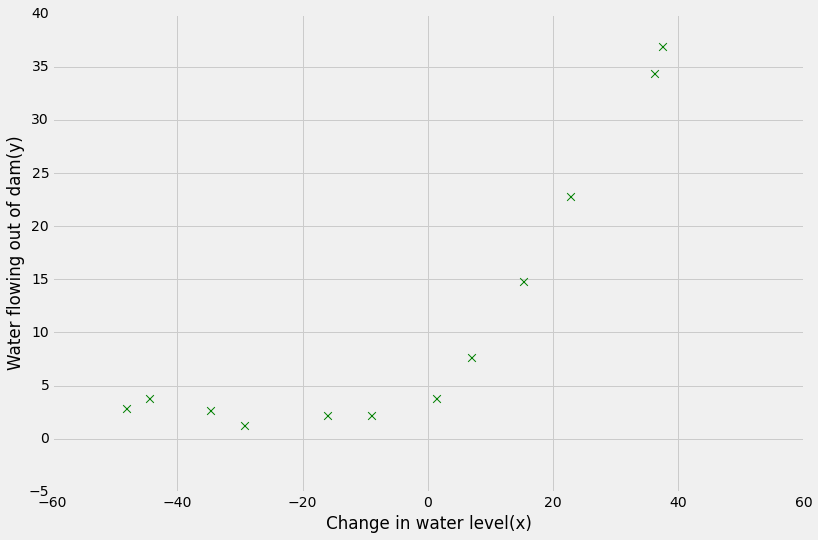

In [4]:
plt.scatter(X, y, s=60, c='g', marker='x', linewidths=1)
plt.xlabel('Change in water level(x)')
plt.ylabel('Water flowing out of dam(y)')

## Regularized linear regression

Cost function and update rule for regularized linear regression:

** Note: Don't regularize the intercept term! **

$$ J(\theta_0, \theta_1,...) = \dfrac {1}{2m} \displaystyle \sum _{i=1}^m \left (h_\theta (x_{i}) - y_{i} \right)^2 + \frac{\lambda}{2m}\sum_{j=1}^n \theta_j^2$$

$$ \begin{align*}
\text{repeat until convergence: } \lbrace & \newline 
\theta_j := & \theta_j - \alpha \frac{1}{m} \sum\limits_{i=1}^{m}\left((h_\theta(x_{i}) - y_{i}) x_{i}\right) +\frac{\lambda}{m}\theta_{j}\newline
\rbrace&
\end{align*} $$

In [15]:
def gradcostreg(X, y, theta,reg):
    m = y.size
    J = 0    
    h = X.dot(theta)    
    J = np.sum(np.square(h-y))/(2*m) + (reg * theta[1:].T.dot(theta[1:])/ (2*m))
    return J[0]

In [31]:
def optimgradreg(X, y, theta, num_iters= 1500, alpha = 0.01):
    m= y.size
    J_history = np.zeros(num_iters)
    for item in np.arange(num_iters):
        h = X.dot(theta.T)
        theta = theta - alpha/(m)*(X.T.dot(h-y)) + (reg) * (theta[1:]/m)
        J_history[item] = gradcostreg(X,y, theta,reg)
    return theta, J_history

In [32]:
# define reg
reg = 0
theta = np.zeros(2).reshape((-1,1))

In [33]:
theta , Cost_J = optimgradreg(X, y, theta)

ValueError: shapes (12,1) and (2,2) not aligned: 1 (dim 1) != 2 (dim 0)

In [29]:
X.shape

(12L, 1L)

In [30]:
theta.shape

(2L, 1L)